In [1]:
import ee
from geetiles import gee
from geetiles import utils
import geopandas as gpd
import rasterio
from importlib import reload
from rlxutils import subplots
import matplotlib.pyplot as plt
import numpy as np
import os
import contextily as cx
import glob
reload(gee)

<module 'geetiles.gee' from '/home/rlx/geetiles/geetiles/gee.py'>

# select a random chipset and a random chip within it

In [2]:
basedir = "/opt/earthdata/chipsets"
dataset = 's2-2022'

files = glob.glob(f"{basedir}/*/{dataset}/*.tif")
chipsets = np.unique([file.split("/")[-3] for file in files])


In [5]:
chipset = np.random.choice(chipsets)
chipset = '235492c72fa62_partitions_aschips_299de3d3ec673'
chipset_files = [f for f in files if chipset in f]
len(chipset_files)

163

In [6]:
z = gpd.read_file(f"{basedir}/{chipset}.geojson")
z01 = z[z.group.isin(['0','1'])]
z.shape, z01.shape

((1729, 4), (175, 4))

In [7]:
z01.explore()

In [57]:
chipset_file = np.random.choice(chipset_files)
chipset_file = '/opt/earthdata/chipsets/235492c72fa62_partitions_aschips_299de3d3ec673/s2-2022/13ad3c3b94b4d.tif'
chipset_file = [i for i in chipset_files if '1536' in i][0]
identifier = chipset_file.split("/")[-1].split(".")[0]
c = z[z.identifier==identifier].iloc[0]
chipset_file

'/opt/earthdata/chipsets/235492c72fa62_partitions_aschips_299de3d3ec673/s2-2022/1536fe94808d0.tif'

In [58]:
c

area_km2                                              26.204175
identifier                                        1536fe94808d0
group                                                         0
geometry      POLYGON ((-80.13592499645738 -2.98548118680213...
Name: 1562, dtype: object

In [59]:
z[z.identifier==identifier].explore()

In [60]:
with rasterio.open(chipset_file) as f:
    x = f.read()
    d = f.descriptions
    p = f.profile.copy()
x.shape, x.dtype

((40, 512, 512), dtype('uint8'))

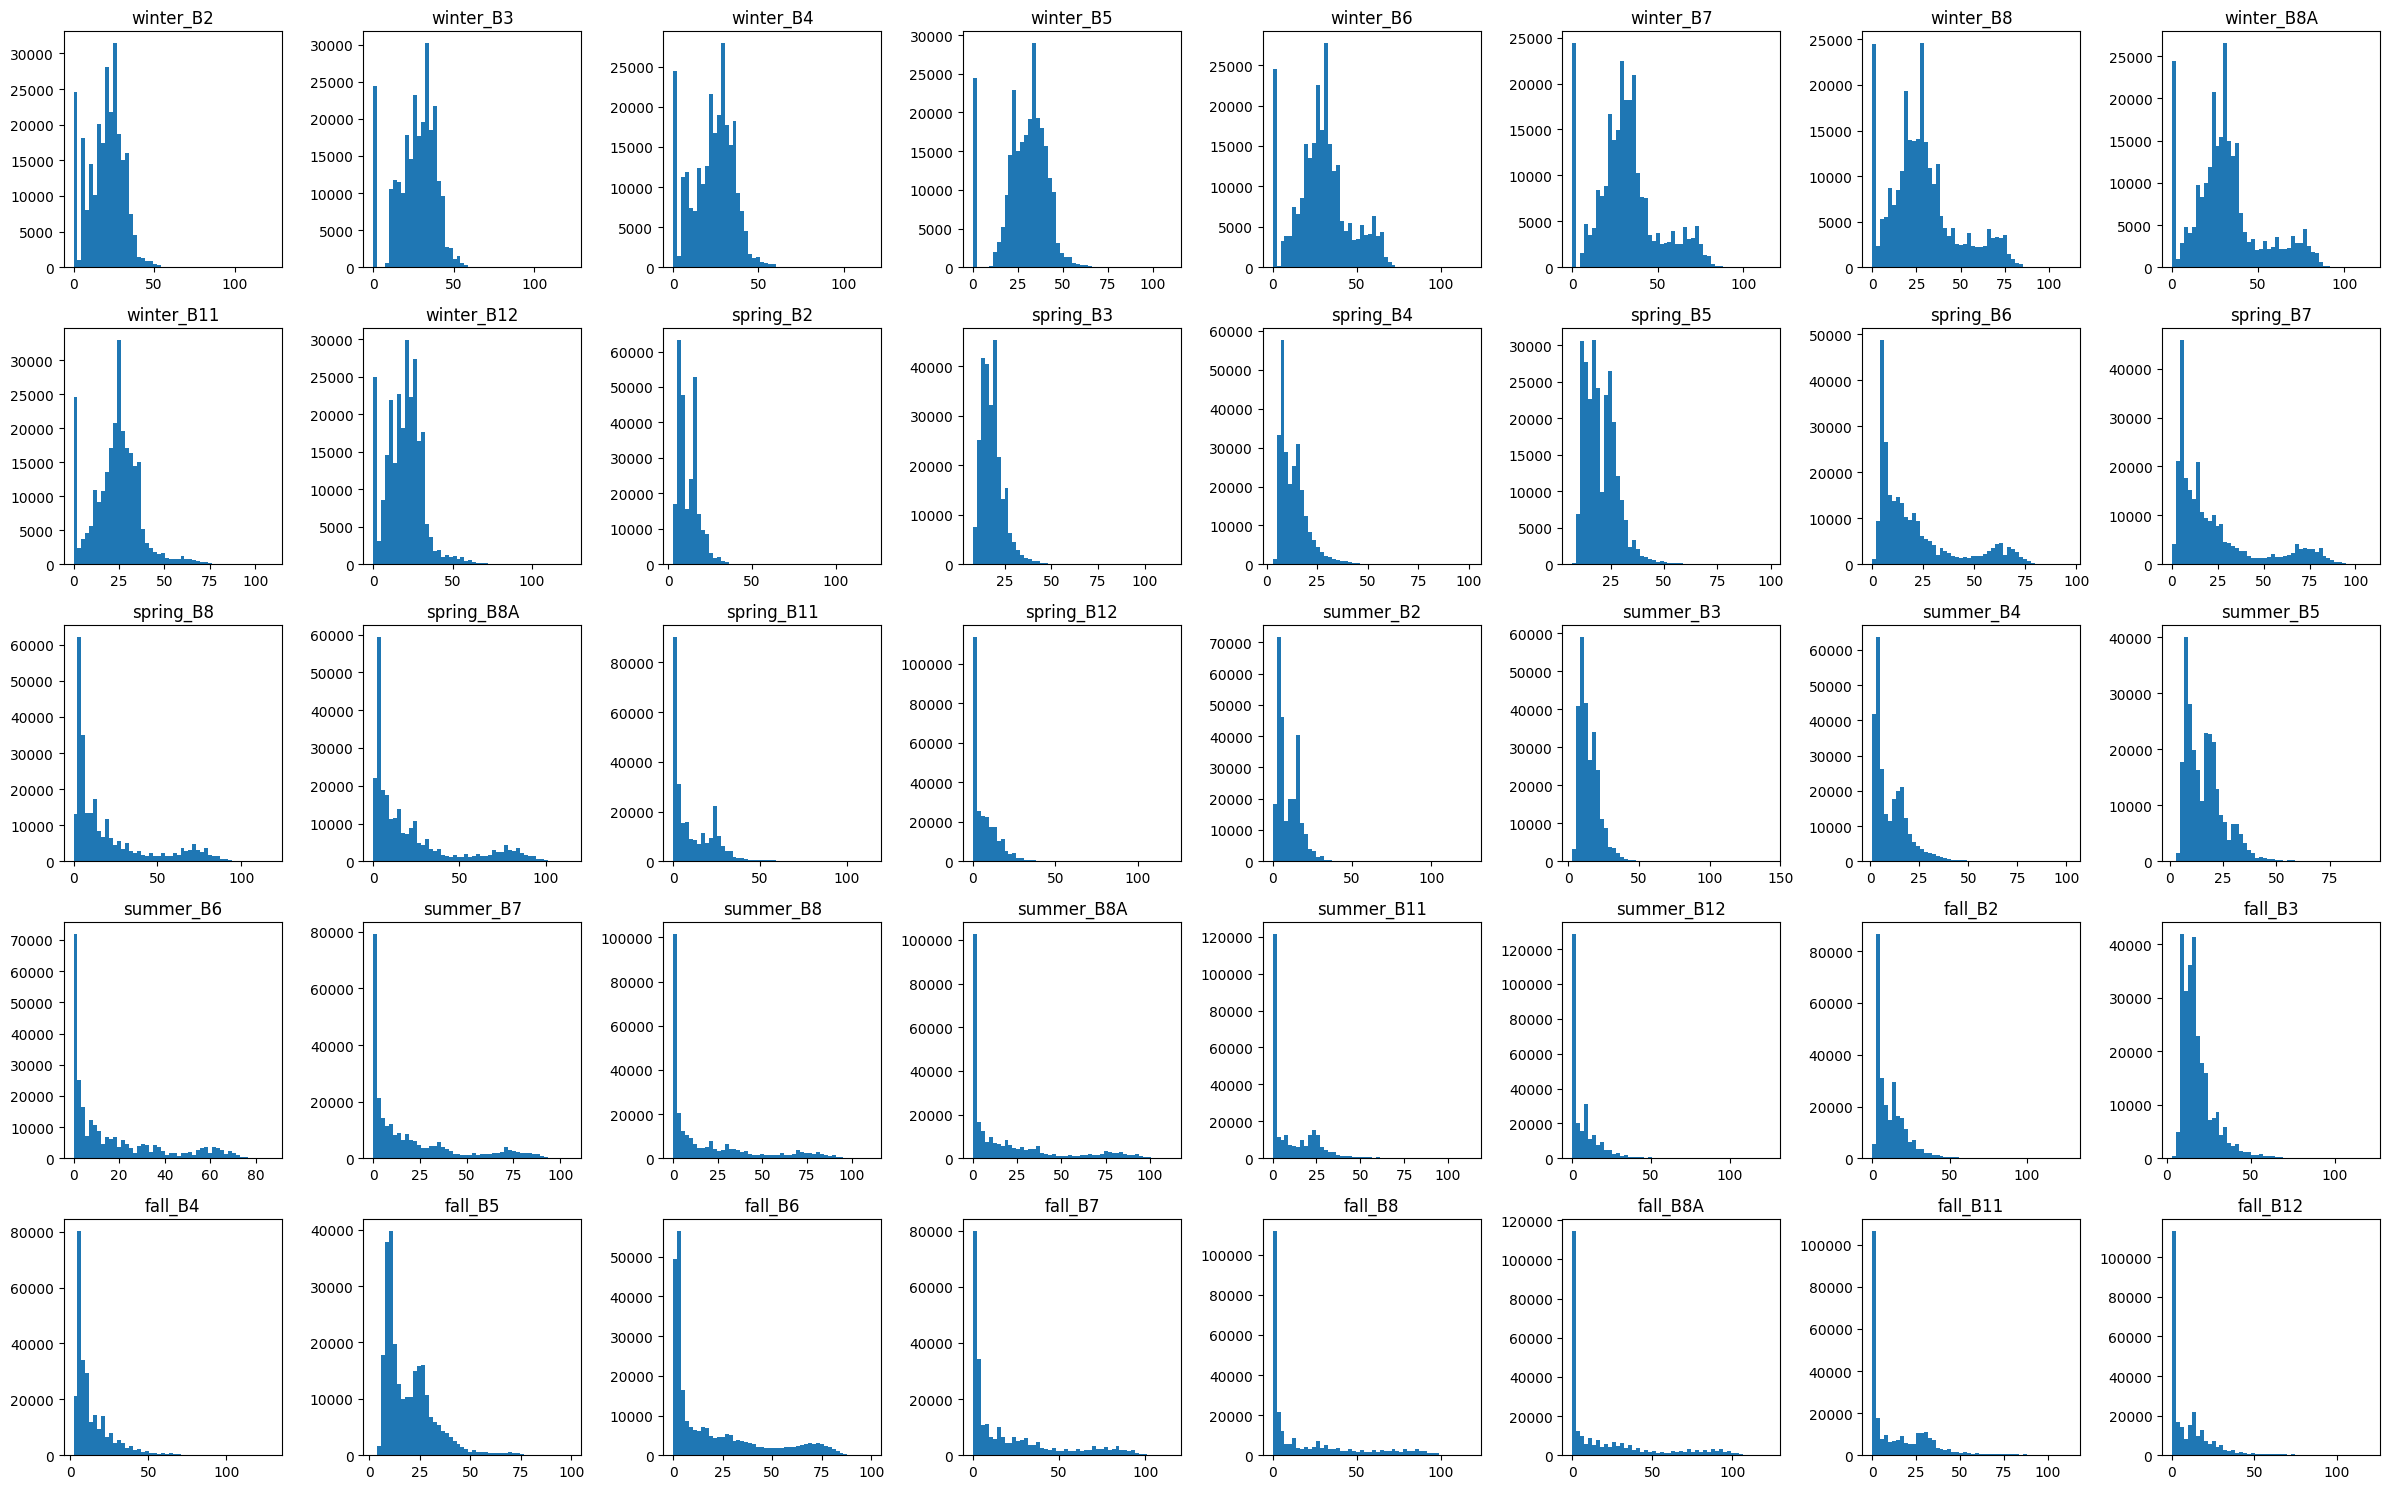

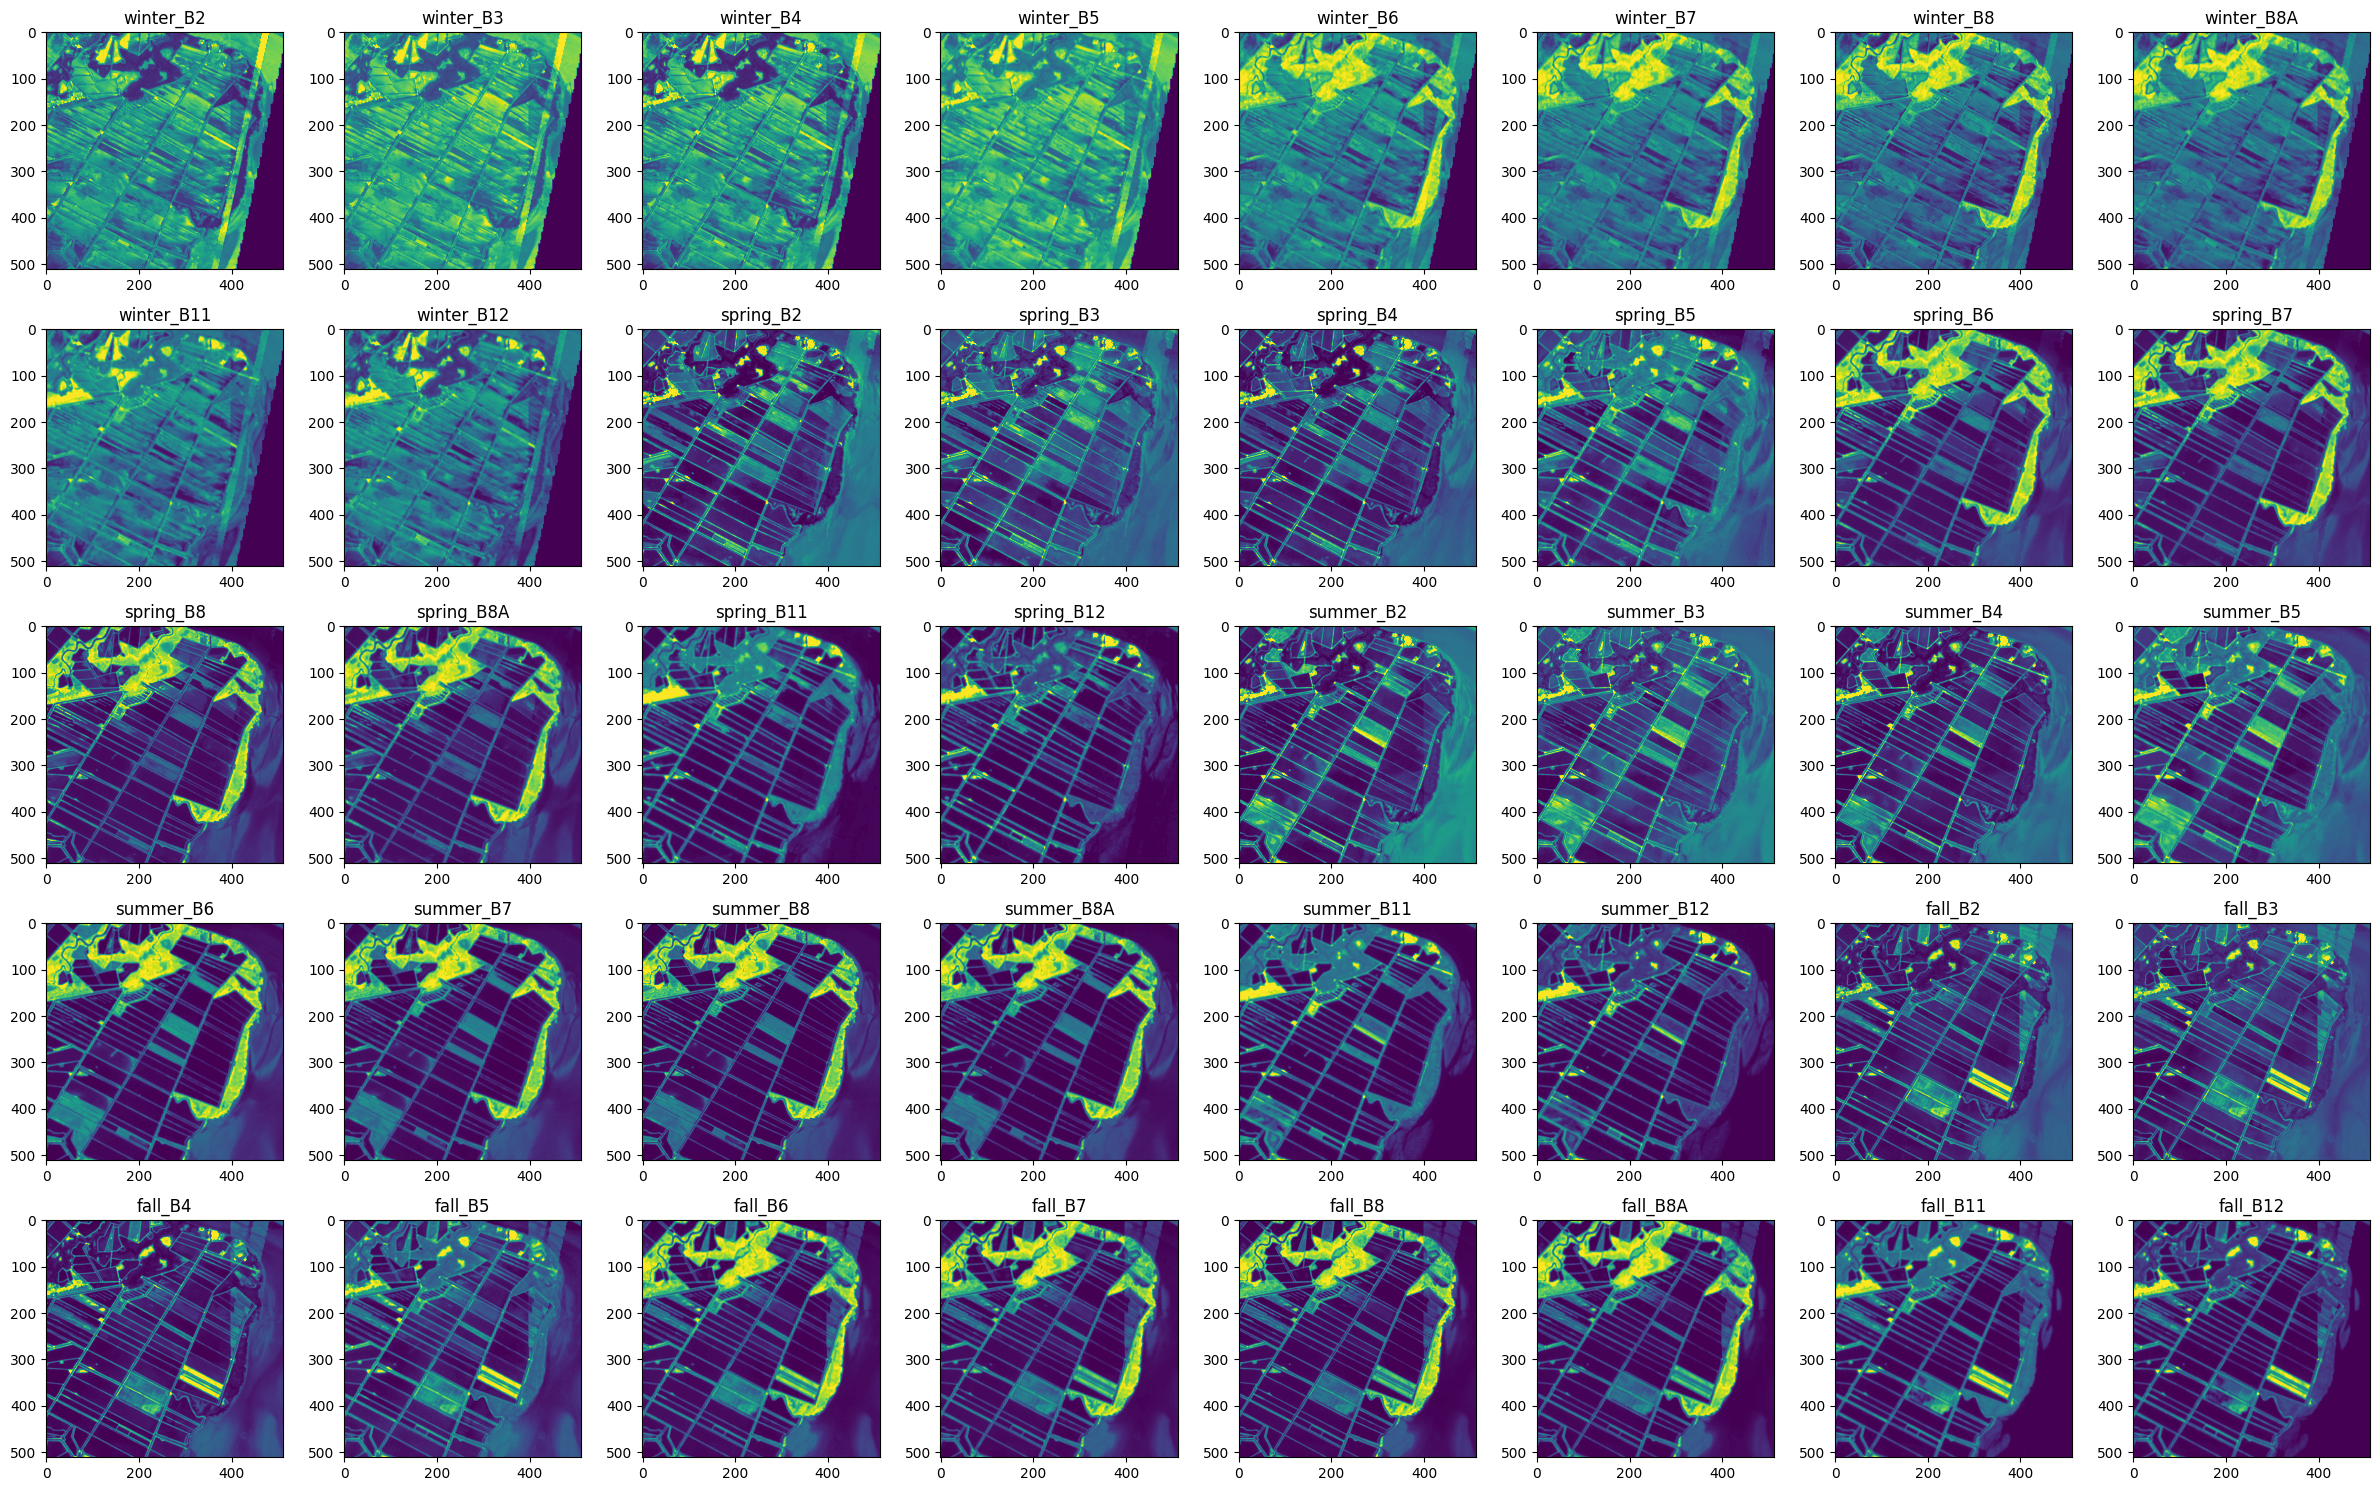

In [61]:
for ax,i in subplots(len(d), n_cols=8):
    plt.hist(x[i].flatten(), bins=50);
    plt.title(d[i])
    
for ax,i in subplots(len(d), n_cols=8):
    a,b = np.percentile(x[i], (1,99))
    plt.imshow(x[i], vmin=a, vmax=b)
    plt.title(d[i])

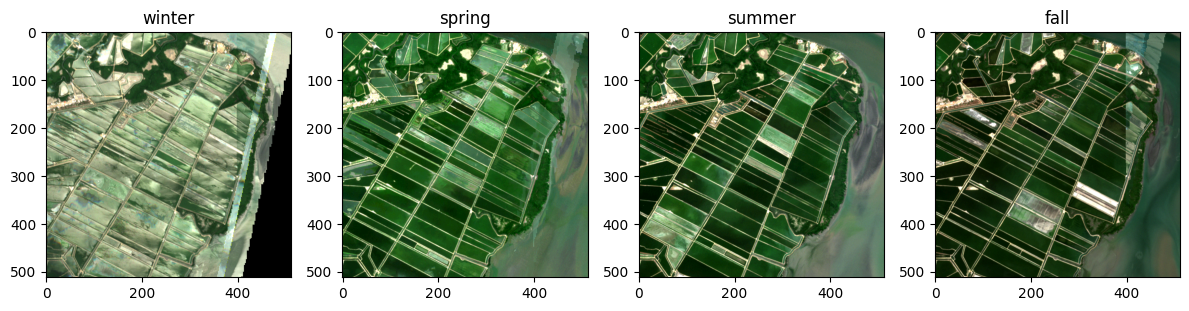

In [62]:
for ax,season in subplots(['winter', 'spring', 'summer', 'fall']):

    b4idx = np.argwhere(np.r_[list(d)] == f"{season}_B4")[0,0]
    b3idx = np.argwhere(np.r_[list(d)] == f"{season}_B3")[0,0]
    b2idx = np.argwhere(np.r_[list(d)] == f"{season}_B2")[0,0]
    xs = x[[b4idx, b3idx, b2idx]]
    xs = np.transpose(xs, [1,2,0]) / 255
    a,b = np.percentile(xs, (1,99))
    xs = (xs-a)/(b-a)
    xs[xs<0]=0
    xs[xs>1]=1
    plt.imshow(xs)
    plt.title(season)

# interesting chips

In [158]:
# flood               '/opt/earthdata/chipsets/235492c72fa62_partitions_aschips_299de3d3ec673/s1grd-2022/13ad3c3b94b4d.tif'
# changing river flow '/opt/earthdata/chipsets/235492c72fa62_partitions_aschips_299de3d3ec673/s2-2022/34fb2c228563b.tif'


area_km2                                              26.204167
identifier                                        1ed2e2a296714
group                                                         0
geometry      POLYGON ((-80.2284619285932 -2.337117475049614...
Name: 1369, dtype: object

In [52]:
chipset_file

'/opt/earthdata/chipsets/235492c72fa62_partitions_aschips_299de3d3ec673/s2-2022/34fb2c228563b.tif'